In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

# Example list of Bangla stopwords (expand as needed)
bangla_stopwords = set([
    "এবং", "কিন্তু", "যদি", "তবে", "বা", "এই", "সে", "তার", "তাদের", "অথবা", 
    "কী", "হতে", "কেন", "কিছু", "আপনি", "আমি", "আমরা", "তোমরা", "এটা", "তারপর"
])

# Load the dataset
text_data_path = 'F:/MS Thesis/Research/Text.csv'
df = pd.read_csv(text_data_path)

# Text Preprocessing (remove non-Bengali characters, tokenization, stopwords removal)
def preprocess_text(text):
    # Remove non-Bengali characters and unnecessary symbols
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    # Tokenize text and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in bangla_stopwords]
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Label Encoding for target variable
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Save class name mapping for reference
class_mapping = pd.DataFrame({
    'Class_Name': label_encoder.classes_,
    'Encoded_Label': range(len(label_encoder.classes_))
})
class_mapping_path = 'F:/MS Thesis/Research/ClassMapping.csv'
class_mapping.to_csv(class_mapping_path, index=False, encoding='utf-8-sig')

# Save the preprocessed data to a CSV file
output_path = 'F:/MS Thesis/Research/BanglaText.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"Preprocessed data saved to {output_path}")
print(f"Class mapping saved to {class_mapping_path}")


Preprocessed data saved to F:/MS Thesis/Research/BanglaText.csv
Class mapping saved to F:/MS Thesis/Research/ClassMapping.csv


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Labels
y = df['Emotion']

# Save vectorized features
import numpy as np
np.save('F:/MS Thesis/Research/X_tfidf.npy', X.toarray())
np.save('F:/MS Thesis/Research/y_labels.npy', y)

print("Features and labels saved successfully.")

Features and labels saved successfully.


In [ ]:
Traditional ML Models:
SVM, Naive Bayes, Random Forest, XGBoost → Use TF-IDF features.

Data split into train, validation, and test sets.
SVM - Test Accuracy: 0.45
              precision    recall  f1-score   support

       angry       0.38      0.44      0.41       102
     disgust       0.38      0.41      0.40        98
        fear       0.60      0.55      0.57        95
       happy       0.55      0.51      0.53       104
         sad       0.31      0.24      0.27       103
    surprise       0.48      0.56      0.52        98

    accuracy                           0.45       600
   macro avg       0.45      0.45      0.45       600
weighted avg       0.45      0.45      0.45       600



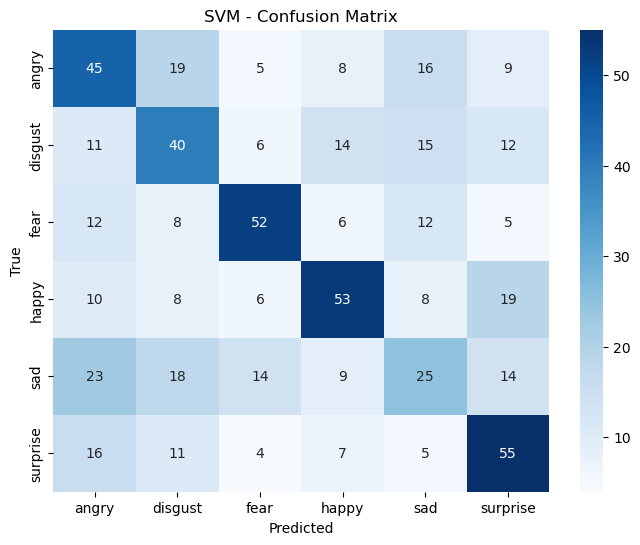

Naive Bayes - Test Accuracy: 0.42
              precision    recall  f1-score   support

       angry       0.36      0.45      0.40       102
     disgust       0.39      0.32      0.35        98
        fear       0.60      0.48      0.53        95
       happy       0.48      0.55      0.51       104
         sad       0.27      0.31      0.29       103
    surprise       0.48      0.39      0.43        98

    accuracy                           0.42       600
   macro avg       0.43      0.42      0.42       600
weighted avg       0.43      0.42      0.42       600



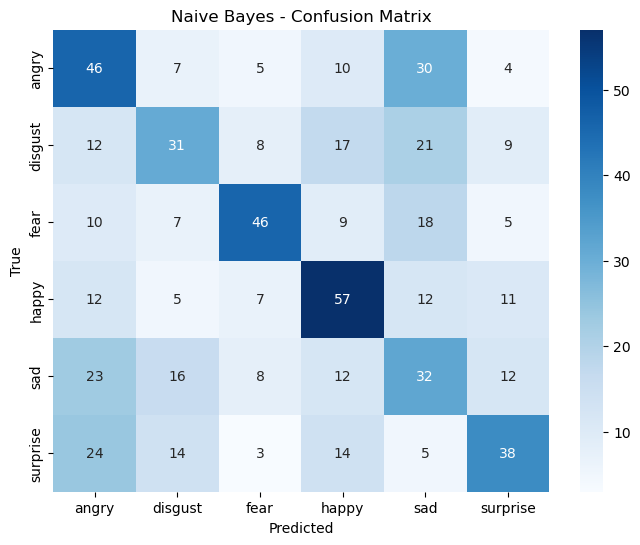

Random Forest - Test Accuracy: 0.56
              precision    recall  f1-score   support

       angry       0.47      0.51      0.49       102
     disgust       0.61      0.47      0.53        98
        fear       0.70      0.65      0.68        95
       happy       0.56      0.60      0.58       104
         sad       0.44      0.41      0.42       103
    surprise       0.59      0.71      0.65        98

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.56      0.56      0.55       600



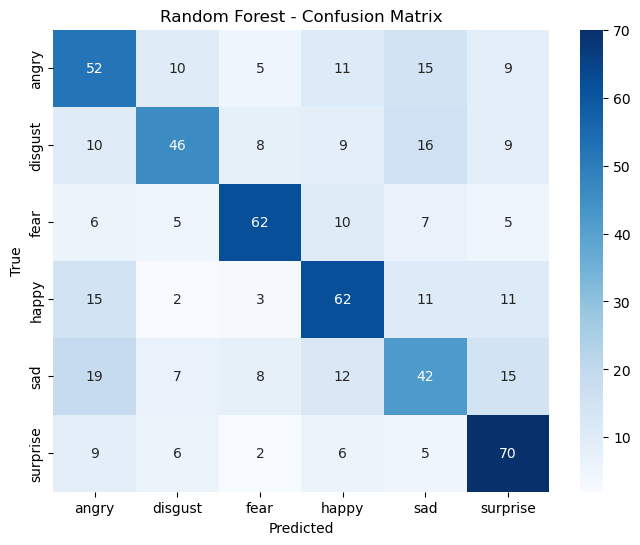

E:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [18:55:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Test Accuracy: 0.50
              precision    recall  f1-score   support

       angry       0.47      0.43      0.45       102
     disgust       0.49      0.40      0.44        98
        fear       0.61      0.63      0.62        95
       happy       0.53      0.52      0.52       104
         sad       0.46      0.37      0.41       103
    surprise       0.45      0.66      0.53        98

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



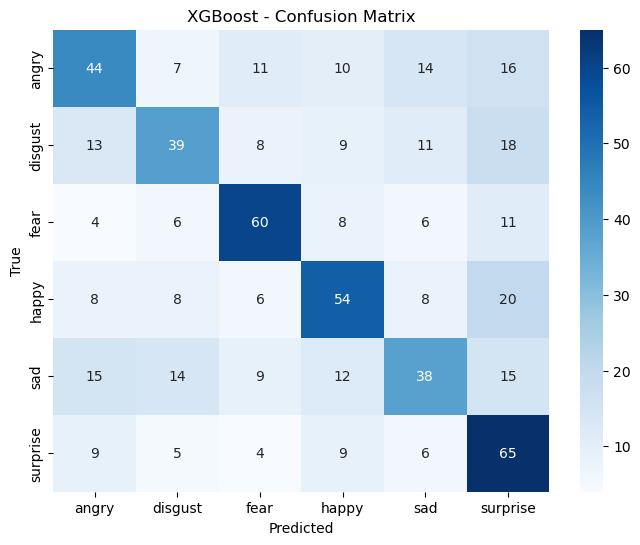

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the saved features and labels
X = np.load('F:/MS Thesis/Research/X_tfidf.npy')
y = np.load('F:/MS Thesis/Research/y_labels.npy', allow_pickle=True)

# Encode labels into numeric format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to numeric

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Data split into train, validation, and test sets.")

# Initialize models
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train, Evaluate, and Visualize Results
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy and classification report
    print(f"{name} - Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Training data shape: (4800, 100), Test data shape: (600, 100)
Epoch 1/10


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.2272 - loss: 1.7740 - val_accuracy: 0.3683 - val_loss: 1.6301
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.5520 - loss: 1.3001 - val_accuracy: 0.5300 - val_loss: 1.2773
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.8322 - loss: 0.5725 - val_accuracy: 0.5583 - val_loss: 1.2970
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9190 - loss: 0.2861 - val_accuracy: 0.5817 - val_loss: 1.3488
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9597 - loss: 0.1607 - val_accuracy: 0.5783 - val_loss: 1.4996
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9709 - loss: 0.1145 - val_accuracy: 0.5833 - val_loss: 1.6124
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.9707 - loss: 0.1104 - val_accuracy: 0.5867 - val_loss: 1.6440
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.9717 - loss: 0.0948 - val

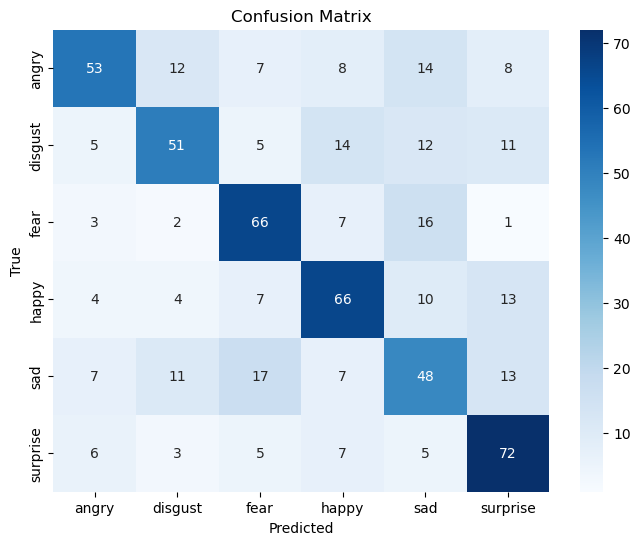

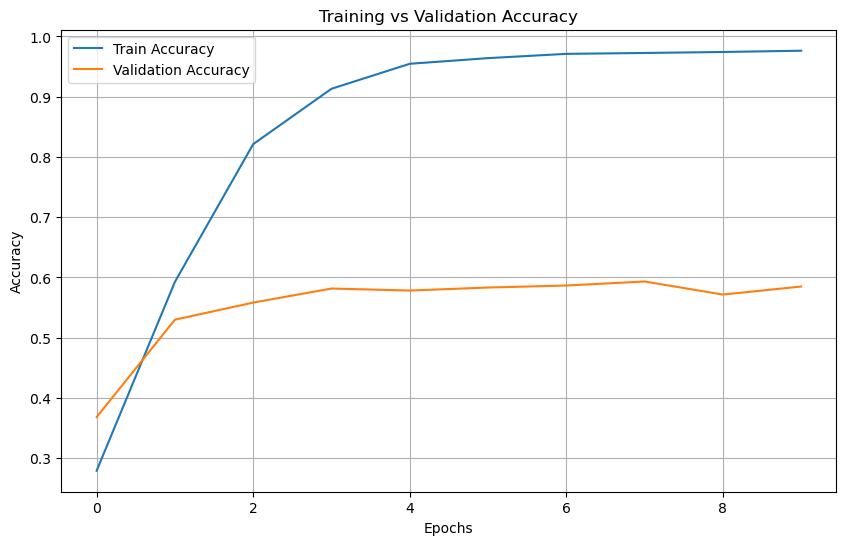

In [14]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/Research/BanglaText.csv'
df = pd.read_csv(data_path)

# Encode emotion labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])
y = df['Encoded_Emotion']

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create LSTM model
model_lstm = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQ_LEN),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(6, activation='softmax')  # 6 emotions
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

BATCH_SIZE = 32
EPOCHS = 10

# Train the model
history = model_lstm.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model_lstm.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


Training data shape: (4800, 100), Test data shape: (600, 100)
Epoch 1/10


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 182ms/step - accuracy: 0.2006 - loss: 1.7785 - val_accuracy: 0.3267 - val_loss: 1.6512
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.5037 - loss: 1.3894 - val_accuracy: 0.5050 - val_loss: 1.3445
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - accuracy: 0.8161 - loss: 0.6153 - val_accuracy: 0.5683 - val_loss: 1.2520
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - accuracy: 0.9220 - loss: 0.2941 - val_accuracy: 0.5850 - val_loss: 1.3524
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.9570 - loss: 0.1558 - val_accuracy: 0.5850 - val_loss: 1.5120
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 179ms/step - accuracy: 0.9722 - loss: 0.1132 - val_accuracy: 0.5800 - val_loss: 1.5420
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.9729 - loss: 0.0963 - val_accuracy: 0.5983 - val_loss: 1.5489
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.9736 - loss: 0.0854 - val

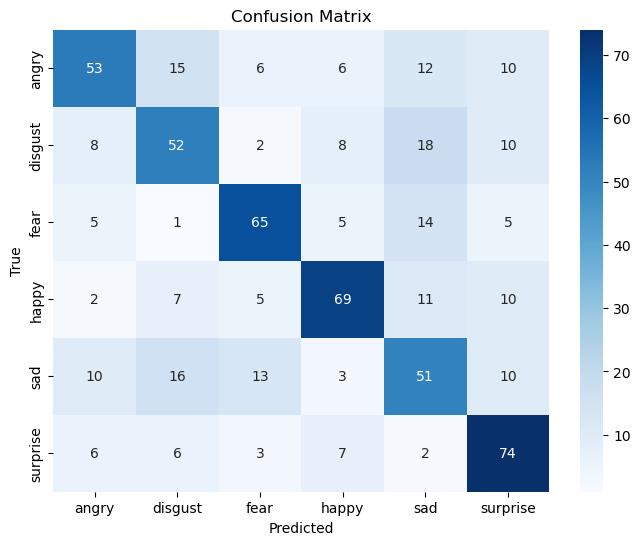

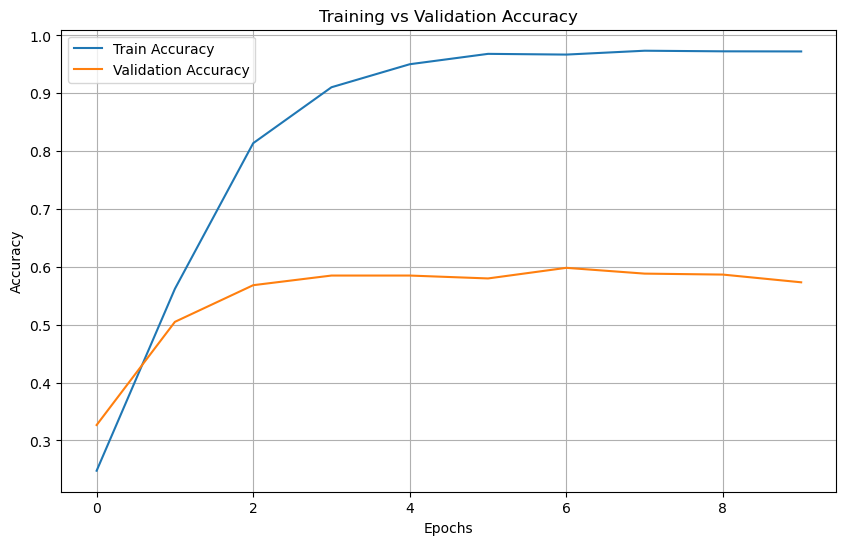

In [10]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/Research/BanglaText.csv'
df = pd.read_csv(data_path)

# Encode emotion labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])
y = df['Encoded_Emotion']

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create Bi-LSTM model
model_bi_lstm = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQ_LEN),
    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)),
    Dense(6, activation='softmax')  # 6 emotions
])

model_bi_lstm.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

BATCH_SIZE = 32
EPOCHS = 10

# Train the model
history = model_bi_lstm.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model_bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model_bi_lstm.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


Training data shape: (4800, 100), Test data shape: (600, 100)


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.2161 - loss: 1.7768 - val_accuracy: 0.4550 - val_loss: 1.5991
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6392 - loss: 1.2416 - val_accuracy: 0.5850 - val_loss: 1.1536
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9282 - loss: 0.3281 - val_accuracy: 0.6067 - val_loss: 1.1919
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9741 - loss: 0.1270 - val_accuracy: 0.6067 - val_loss: 1.2879
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9802 - loss: 0.1002 - val_accuracy: 0.6050 - val_loss: 1.3113
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9815 - loss: 0.0858 - val_accuracy: 0.6183 - val_loss: 1.3371
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9747 - loss: 0.0813 - val_accuracy: 0.5983 - val_loss: 1.3997
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9800 - loss: 0.0727 - val_ac

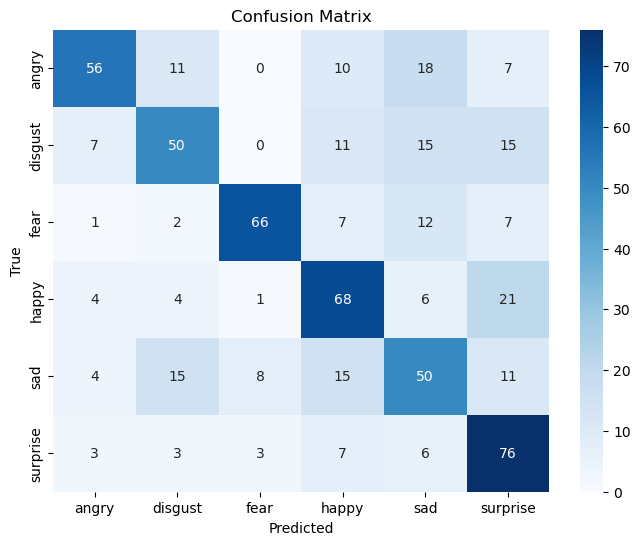

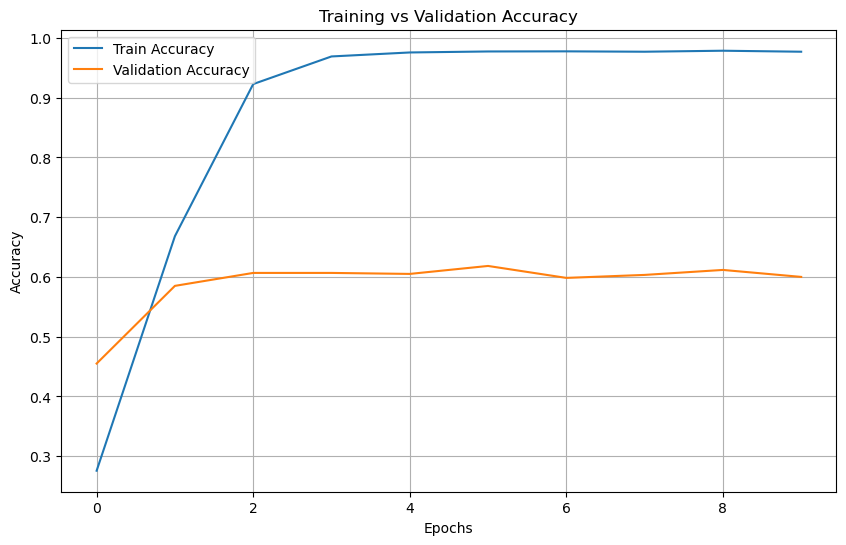

In [15]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/Research/BanglaText.csv'
df = pd.read_csv(data_path)

# Encode emotion labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])
y = df['Encoded_Emotion']

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create CNN model
model_cnn = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQ_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 emotions
])

model_cnn.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

BATCH_SIZE = 32
EPOCHS = 10

# Train the model
history = model_cnn.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE
)

# Evaluate the model
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model_cnn.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


Training data shape: (4800, 100), Test data shape: (600, 100)


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 177ms/step - accuracy: 0.1740 - loss: 1.7879 - val_accuracy: 0.3267 - val_loss: 1.6292
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 176ms/step - accuracy: 0.4499 - loss: 1.3773 - val_accuracy: 0.5033 - val_loss: 1.3666
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - accuracy: 0.7751 - loss: 0.6709 - val_accuracy: 0.5567 - val_loss: 1.3758
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 178ms/step - accuracy: 0.9128 - loss: 0.3122 - val_accuracy: 0.5850 - val_loss: 1.5950
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 167ms/step - accuracy: 0.9541 - loss: 0.1675 - val_accuracy: 0.5933 - val_loss: 1.6639
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.9704 - loss: 0.1046 - val_accuracy: 0.5850 - val_loss: 1.7697
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 169ms/step - accuracy: 0.9761 - loss: 0.0820 - val_accuracy: 0.5733 - val_loss: 1.8465
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.9760 - loss: 0

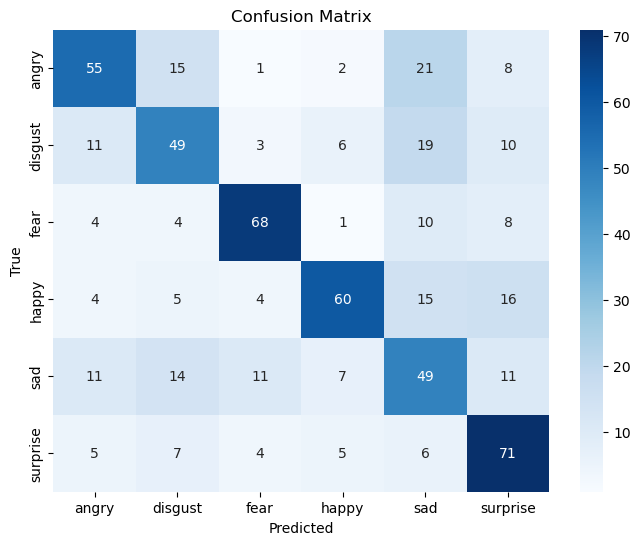

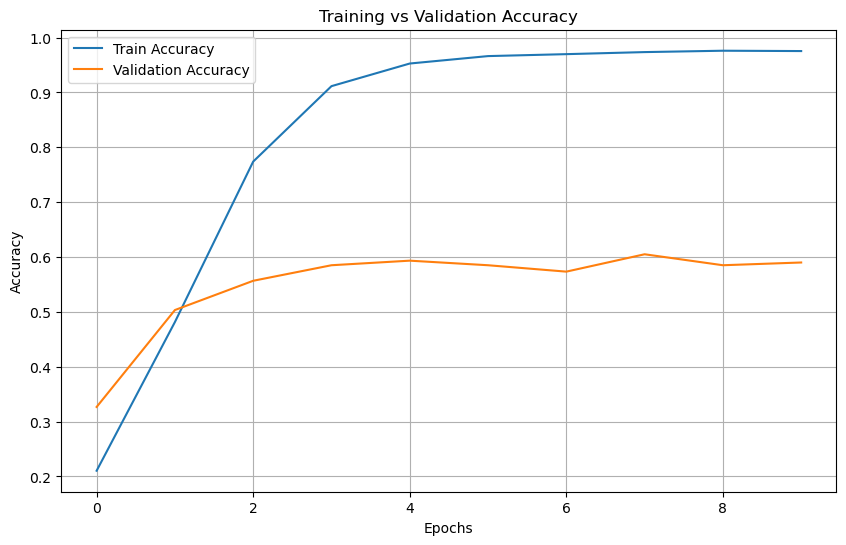

In [17]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/Research/BanglaText.csv'
df = pd.read_csv(data_path)

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Encoding the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Emotion'])  # Convert categorical labels to numeric

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create CNN + Bi-LSTM model
embedding_layer = Embedding(input_dim=20000, output_dim=128, input_length=MAX_SEQ_LEN)

model = Sequential()

# CNN Layer
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Bi-LSTM Layer
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))

# Fully Connected Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))  # 6 emotions

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 10

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report with actual emotion labels
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix with actual emotion labels
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()
